In [1]:
%config Completer.use_jedi = False
# from matplotlib.figure import Figure
import matplotlib.pyplot as plt
# from matplotlib.transforms import IdentityTransform
# %matplotlib qt
import numpy as np
# Set up numpy print options to only wrap at window width:
np.set_printoptions(edgeitems=30, linewidth=100000, formatter=dict(float=lambda x: "%g" % x)) # this somehow fucked up and caused rounding of my values...

from pyphocorehelpers.indexing_helpers import get_bin_centers


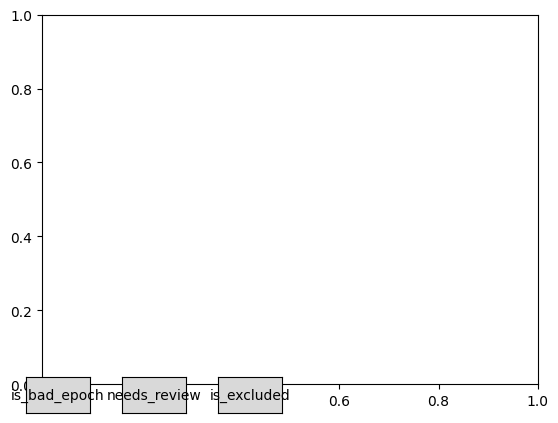

In [2]:
import matplotlib.pyplot as plt
from matplotlib.widgets import Button

# Define the axis properties 
axis_properties = {
    'is_bad_epoch': False,
    'needs_review': True,
    'is_excluded': False,
    # ... Add other properties as needed.
}

# Function to toggle the properties and update the display
def toggle_property(event, property_name):
    axis_properties[property_name] = not axis_properties[property_name]
    update_display(property_name, buttons[property_name])

# Function to update the display/icons after each toggle
def update_display(property_name, button):
    # Here you could change the appearance of the button based on the state
    # For example, change the facecolor of the button:
    if axis_properties[property_name]:
        button.color = 'green'
    else:
        button.color = 'red'
    button.ax.figure.canvas.draw_idle()  # Redraw the button with new color

# Create your main plot here with Matplotlib
fig, ax = plt.subplots()

# Define the position for buttons. This has to be determined manually.
button_positions = {
    'is_bad_epoch': [0.1, 0.05, 0.1, 0.075],
    'needs_review': [0.25, 0.05, 0.1, 0.075],
    'is_excluded': [0.4, 0.05, 0.1, 0.075],
    # Define other positions as needed
}

buttons = {}  # Dictionary to hold buttons

for prop in axis_properties:
    button_ax = plt.axes(button_positions[prop])  # Define position for this button.
    button = Button(button_ax, prop)
    button.on_clicked(lambda event, prop=prop: toggle_property(event, prop))
    buttons[prop] = button
    update_display(prop, button)  # Initial update so buttons have the correct color

# Display the plot
plt.show()


In [3]:
"""
There should be one bin per center, meaning that there should be 1+num bins edges
"""

def debug_print_shapes(*args, **kwargs):
    out_strings = []
    for i, an_ordered_arg in enumerate(args):
        out_strings.append(f'args[{i}]: np.shape: {np.shape(args[i])}')
    for key, val in kwargs.items():
        out_strings.append(f'{key}: np.shape: {np.shape(val)}')
    out_string = '\n'.join(out_strings)
    print(out_string)
    
    
# def test_simple_data():
#     # Please note that the histogram does not follow the Cartesian convention where x values are on the abscissa and y values on the ordinate axis. Rather, x is histogrammed along the first dimension of the array (vertical), and y along the second dimension of the array (horizontal).
#     raw_occupancy, xedges, yedges = np.histogram2d(x, y, bins=(xbin, ybin))
    
# def _check_bin_consistency(xbin_edges, ybin_edges, xbin_centers, ybin_centers):
    
    
num_x_bins = 100
num_y_bins = 15

num_x_bin_edges = num_x_bins + 1
num_y_bin_edges = num_y_bins + 1

xbin_edges = np.linspace(75.0, 400.0, num=num_x_bin_edges) # Get the bin values
ybin_edges = np.linspace(200.0, 240.0, num=num_y_bin_edges) # Get the bin values using fixed endpoints and a fixed number of bins.
xbin_centers = get_bin_centers(xbin_edges)
ybin_centers = get_bin_centers(ybin_edges)
# print(f'xbin_edges: {xbin_edges}\nxbin_centers: {xbin_centers}\nybin_edges: {ybin_edges}\nybin_centers: {ybin_centers}')

# Build the data matrix with one entry for each bin
matrix = np.zeros((len(xbin_centers), len(ybin_centers)))
# Add details to make it possible to tell orientation:
matrix[20, 10] = 1.0 # Here, the first index refers to the x-bin, and the second index refers to the y-bin.

debug_print_shapes(xbin_edges=xbin_edges, xbin_centers=xbin_centers, ybin_edges=ybin_edges, ybin_centers=ybin_centers, matrix=matrix)
""" the matrix is a [N_x x N_y] matrix, where the first axis corresponds to the x-value """

xbin_edges: np.shape: (101,)
xbin_centers: np.shape: (100,)
ybin_edges: np.shape: (16,)
ybin_centers: np.shape: (15,)
matrix: np.shape: (100, 15)


' the matrix is a [N_x x N_y] matrix, where the first axis corresponds to the x-value '

In [4]:
def build_test_data_histogram_matrix():
    non_zero_point_xy = (xbin_centers[20], ybin_centers[10])
    test_x = [xbin_centers[20]]
    test_y = [ybin_centers[10]]
    print(f'non_zero_point_xy: {non_zero_point_xy}')
    matrix2, test_xedges, test_yedges = np.histogram2d(test_x, test_y, bins=(xbin_edges, ybin_edges))
    debug_print_shapes(test_xedges=test_xedges, test_yedges=test_yedges, matrix2=matrix2)
    return matrix2

matrix2 = build_test_data_histogram_matrix()
matrix2[20, 10] # using the same indexing scheme used for matrix, we can access the 1.0 element. That is to say that the x-axis is the first dimension, as we'd expect.
""" When our matrix is generated by passing the specific xbin_edges and ybin_edges to the histogram2d function, everyting is consistent with the x-axis as the first dimension, as we'd expect."""

non_zero_point_xy: (141.625, 228.0)
test_xedges: np.shape: (101,)
test_yedges: np.shape: (16,)
matrix2: np.shape: (100, 15)


" When our matrix is generated by passing the specific xbin_edges and ybin_edges to the histogram2d function, everyting is consistent with the x-axis as the first dimension, as we'd expect."

In [5]:
def build_test_data_histogram_matrix_num_bins():
    non_zero_point_xy = (xbin_centers[20], ybin_centers[10])
    test_x = [xbin_centers[20]]
    test_y = [ybin_centers[10]]
    print(f'non_zero_point_xy: {non_zero_point_xy}')
    matrix3, test_xedges, test_yedges = np.histogram2d(test_x, test_y, bins=(num_x_bins, num_y_bins))
    print(f'test_yedges: {test_yedges}')
    
    debug_print_shapes(test_xedges=test_xedges, test_yedges=test_yedges, matrix3=matrix3)
    return matrix3

matrix3 = build_test_data_histogram_matrix_num_bins()
matrix3[20, 10] # using the same indexing scheme used for matrix, we can access the 1.0 element. That is to say that the x-axis is the first dimension, as we'd expect.
""" When we instead build the histogram using the num_x_bins and num_y_bins, we get the same np.shape of result and number of bins, but the bin values themselves don't match and the indexing does not work. :[ """

non_zero_point_xy: (141.625, 228.0)
test_yedges: [227.5 227.567 227.633 227.7 227.767 227.833 227.9 227.967 228.033 228.1 228.167 228.233 228.3 228.367 228.433 228.5]
test_xedges: np.shape: (101,)
test_yedges: np.shape: (16,)
matrix3: np.shape: (100, 15)


" When we instead build the histogram using the num_x_bins and num_y_bins, we get the same np.shape of result and number of bins, but the bin values themselves don't match and the indexing does not work. :[ "

In [6]:
# Determine the point that lines up with the peak on the imshow matrix (which we know is artificially at the index [10, 10] of the matrix.

lin_max_idx = np.argmax(matrix) # it returns "1010", which doesn't seem right to me...
max_2d_idx = np.unravel_index(lin_max_idx, np.shape(matrix)) # correct, this returns (10, 10), which is expected.
print(f'max_2d_idx: {max_2d_idx}') # returns the same index as would be used to set a value of the matrix ([20, 10])
# To find how this relates to the specified xbins, we need to get the xbins at these corresponding values?
# The actual (x and y values these bins correspond to is determined by using the same indexing convention as defined before.
xbin_centers[max_2d_idx[0]]
ybin_centers[max_2d_idx[1]]


max_2d_idx: (20, 10)


228.0

# Testing and Exploration:

In [9]:
def test_plot_imshow(xbin, ybin, matrix):
    """ fig, ax, im_out = test_plot_imshow(xbin, ybin, matrix) """
    fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(15,15), clear=True)
    # fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(15,15), clear=True)
    # plt.subplots_adjust(left=0.25, bottom=0.25)
    variable_value = matrix
    frame = 0
    # main_plot_kwargs = {
    #     'cmap': 'viridis',
    #     'aspect':'auto',
    # }
    
    main_plot_kwargs = {
        'cmap': 'viridis',
        # 'aspect':'auto',
    }

    # xmin, xmax, ymin, ymax = (active_one_step_decoder.active_time_window_centers[0], active_one_step_decoder.active_time_window_centers[-1], active_one_step_decoder.xbin[0], active_one_step_decoder.xbin[-1])
    xmin, xmax, ymin, ymax = (xbin[0], xbin[-1], ybin[0], ybin[-1])
    # xmin, xmax, ymin, ymax = (active_one_step_decoder.ybin[0], active_one_step_decoder.ybin[-1], active_one_step_decoder.xbin[0], active_one_step_decoder.xbin[-1]) # Reversed x and y axes, seems not good.
    extent = (xmin, xmax, ymin, ymax)
    
    ax = axs[0,0]
    im_out = ax.imshow(variable_value, extent=extent, **main_plot_kwargs, origin='lower')
    ax.set_title(f'origin=lower \nextent=(xmin, xmax, ymin, ymax): {extent}')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    # ax.axis("off")
    
    ax = axs[0,1]
    im_out = ax.imshow(variable_value, extent=extent, **main_plot_kwargs, origin='upper')
    ax.set_title(f'origin=upper \nextent=(xmin, xmax, ymin, ymax): {extent}')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    
    """
    Note that changing the origin while keeping everything else the same doesn't flip the direction of the yaxis labels despite flipping the yaxis of the data.
    """
    
    y_first_extent = (ymin, ymax, xmin, xmax) # swapped the order of the extent axes.
    
    ax = axs[1,0]
    im_out = ax.imshow(variable_value, extent=y_first_extent, **main_plot_kwargs, origin='lower')
    ax.set_title(f'origin=lower \nextent=(ymin, ymax, xmin, xmax): {y_first_extent}')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    # ax.axis("off")
    
    ax = axs[1,1]
    im_out = ax.imshow(variable_value, extent=y_first_extent, **main_plot_kwargs, origin='upper')
    ax.set_title(f'origin=upper \nextent=(ymin, ymax, xmin, xmax): {y_first_extent}')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    
    # plt.title(f'debug_two_step: {variable_name}')
    return fig, axs, im_out

def test_add_point(test_point, ax):
    """ line = test_add_point(test_point, ax) """
    line, = ax.plot(test_point[0], test_point[1], marker='d', markersize=40.0, linestyle='None', color='red')
    return line

def setup_stable_axes_limits(xbins, ybins, ax):
    " manually sets the axis data limits to disable autoscaling given the xbins/ybins "
    ax.set_xlim(left=xbins[0], right=xbins[-1])
    ax.set_ylim(bottom=ybins[0], top=ybins[-1])
    

In [ ]:
xbin_centers[-1]

Text(0, 0.5, 'row, first dimension of array')

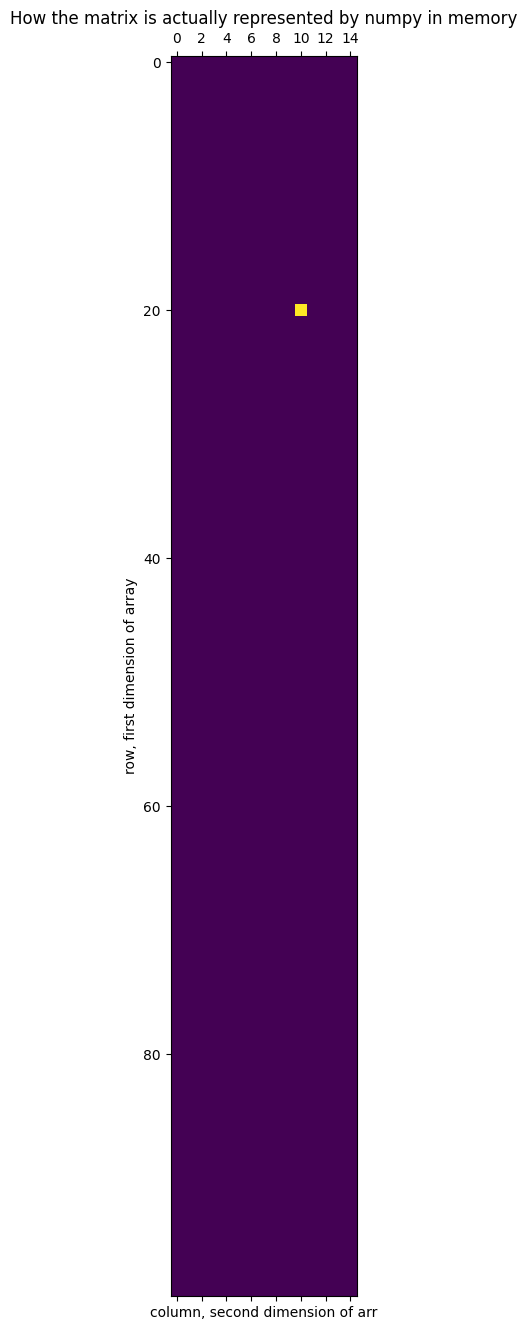

In [10]:
plt.matshow(matrix)
plt.title('How the matrix is actually represented by numpy in memory')
plt.xlabel('column, second dimension of arr')
plt.ylabel('row, first dimension of array')

Text(0.5, 0.98, 'Flipping the extents has no effect at all on the data, although the origin does.')

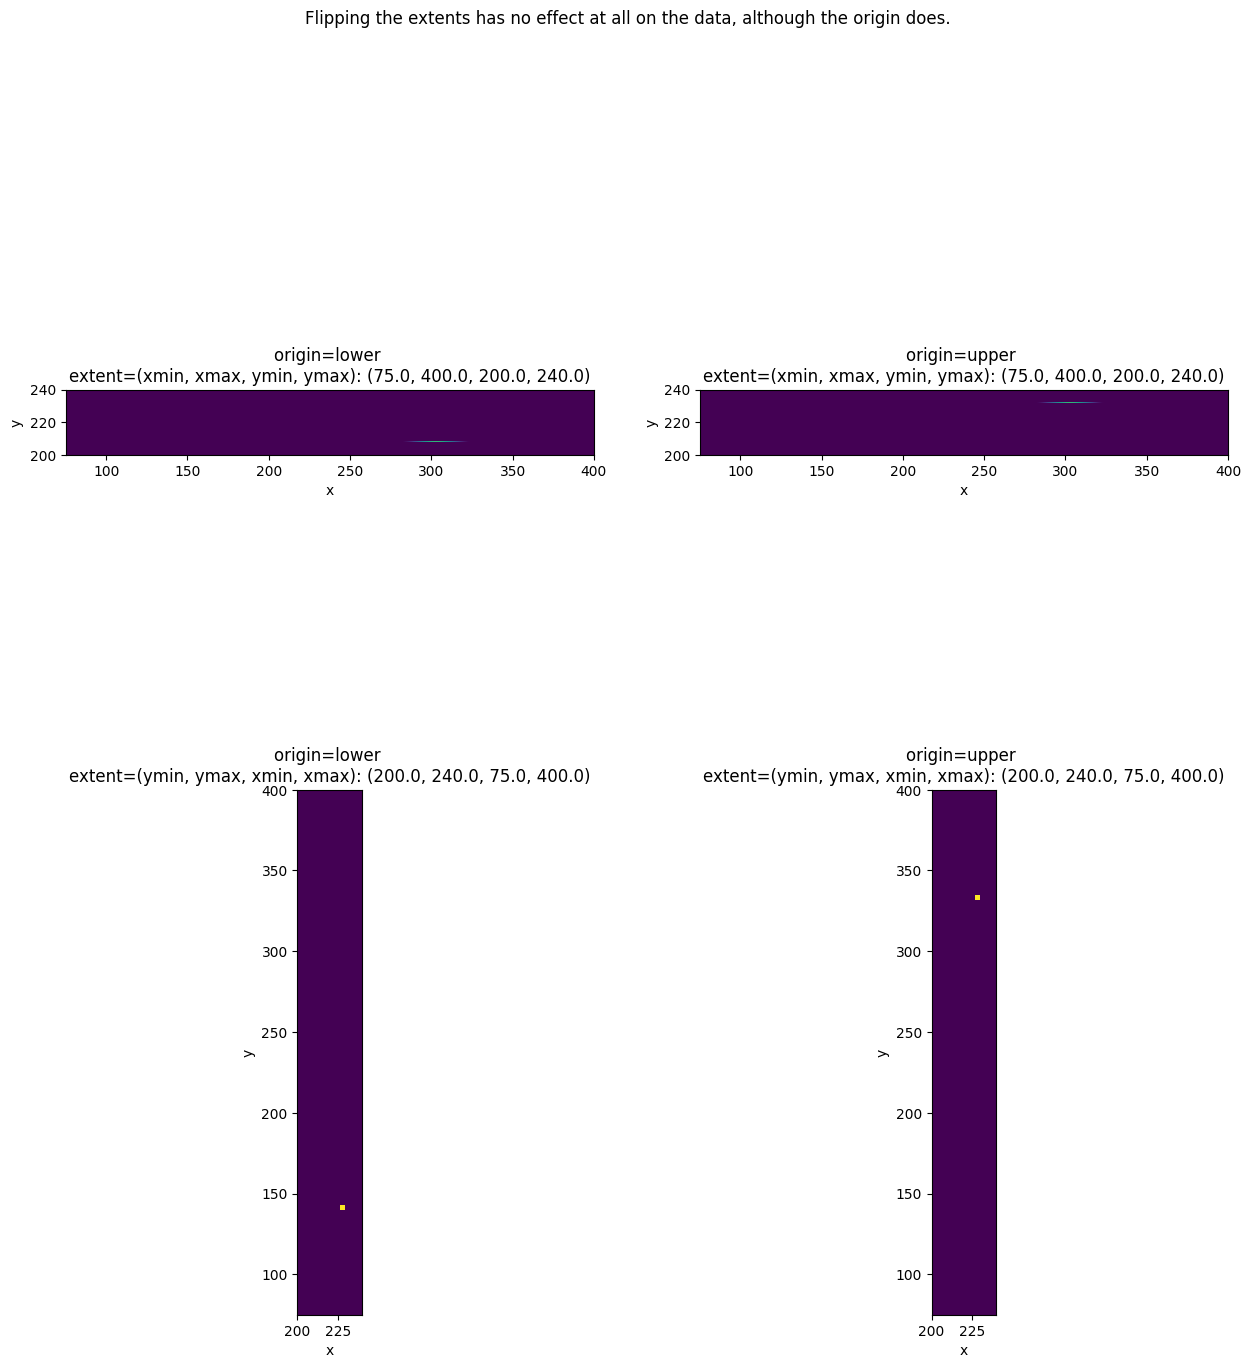

In [11]:
# Perform the plot:
fig, ax, plot_im_out = test_plot_imshow(xbin_edges, ybin_edges, matrix)
plt.suptitle('Flipping the extents has no effect at all on the data, although the origin does.')

Text(0.5, 0.98, 'Plotting the test_point at the indicies into the matrix causes the view to mess up')

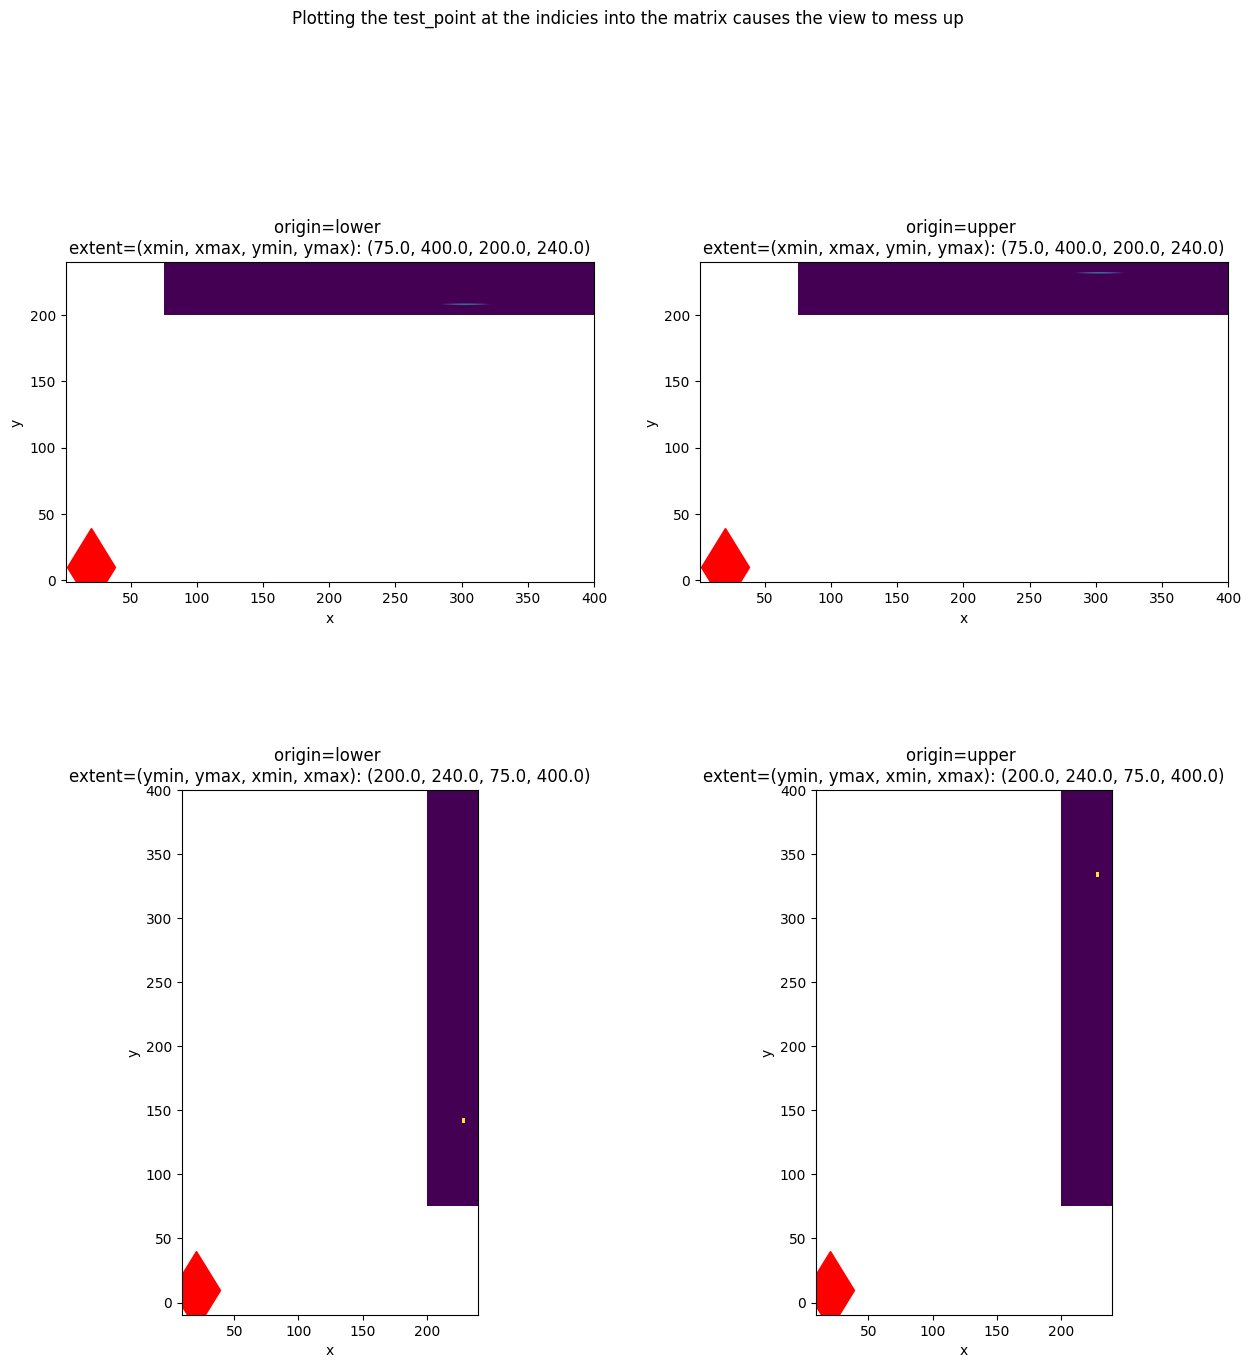

In [12]:
test_point = [20, 10]
# Perform the plot:
fig, axs, plot_im_out = test_plot_imshow(xbin_edges, ybin_edges, matrix)
plot_point = test_add_point(test_point, axs[0][0])
plot_point = test_add_point(test_point, axs[0][1])
plot_point = test_add_point(test_point, axs[1][0])
plot_point = test_add_point(test_point, axs[1][1])
plt.suptitle('Plotting the test_point at the indicies into the matrix causes the view to mess up')

Text(0.5, 0.98, 'Changing the origin from lower to upper has no effect on the plotted test_points (by plot). at the indicies into the matrix causes the view to mess up')

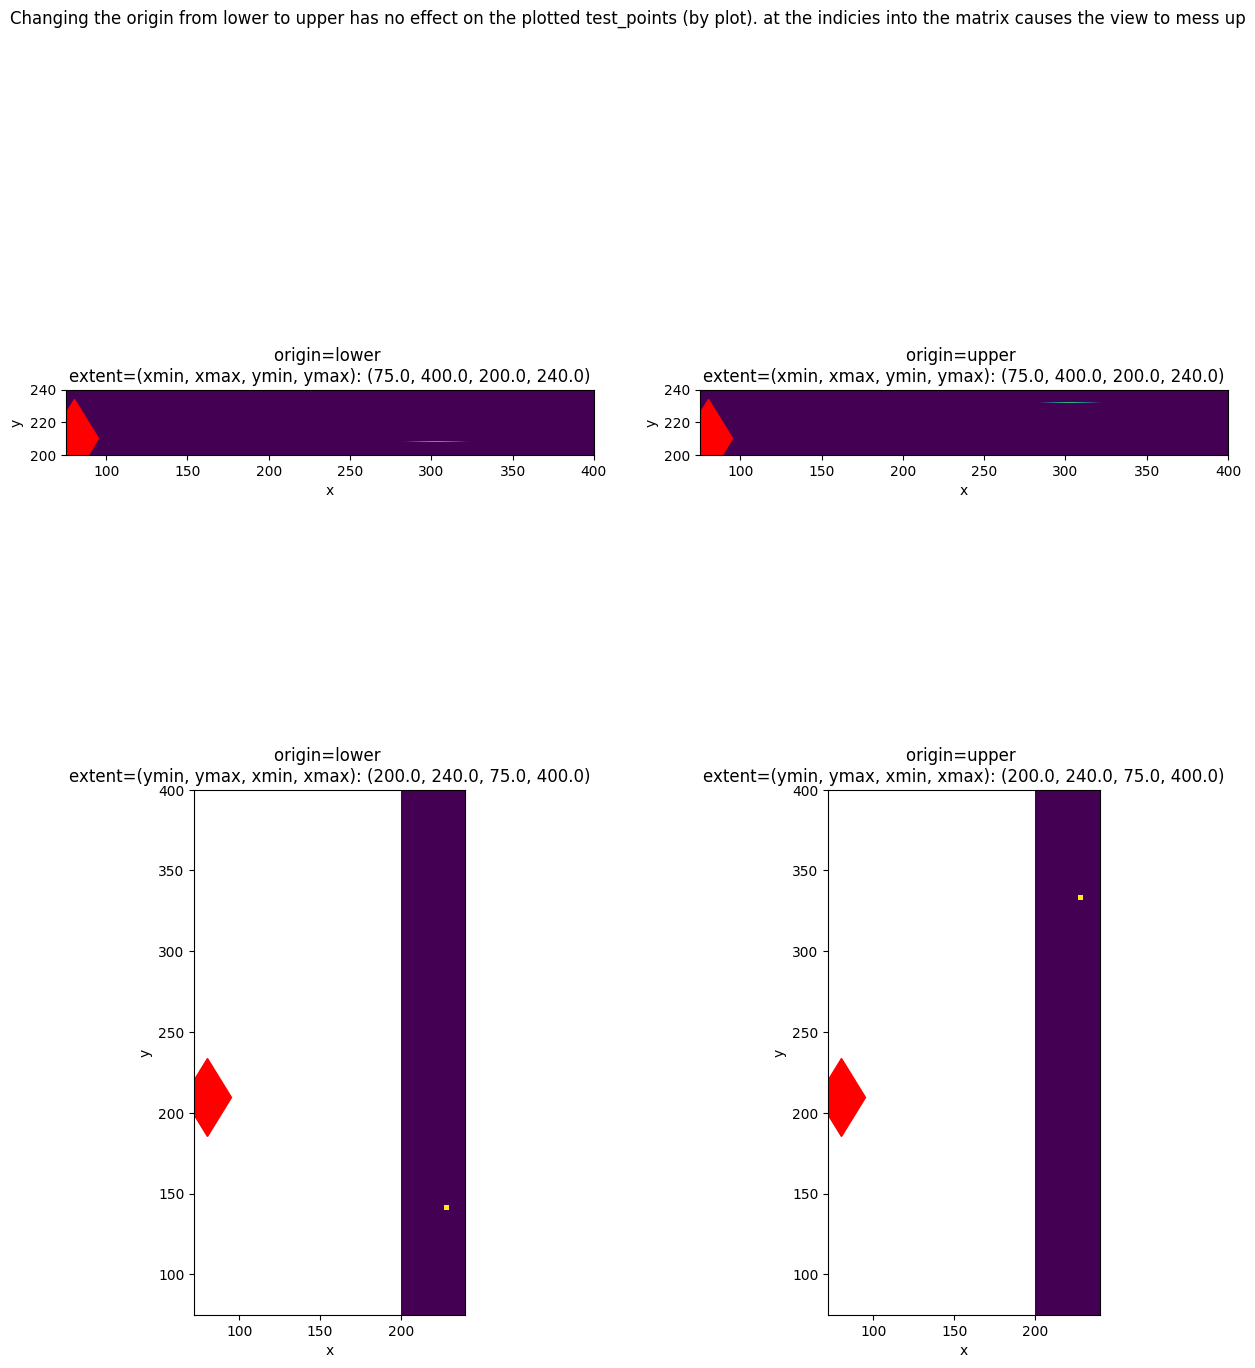

In [13]:
test_point = [80.0, 210.0]
# Perform the plot:
fig, axs, plot_im_out = test_plot_imshow(xbin_edges, ybin_edges, matrix)
plot_point = test_add_point(test_point, axs[0][0])
plot_point = test_add_point(test_point, axs[0][1])
plot_point = test_add_point(test_point, axs[1][0])
plot_point = test_add_point(test_point, axs[1][1])
plt.suptitle('Changing the origin from lower to upper has no effect on the plotted test_points (by plot). at the indicies into the matrix causes the view to mess up')

## The extent set by imshow DOES impact the effect of plotting points with plot(...) on the other hand!

Text(0.5, 0.98, 'Changing the origin from lower to upper has no effect on the plotted test_points (by plot). at the indicies into the matrix causes the view to mess up')

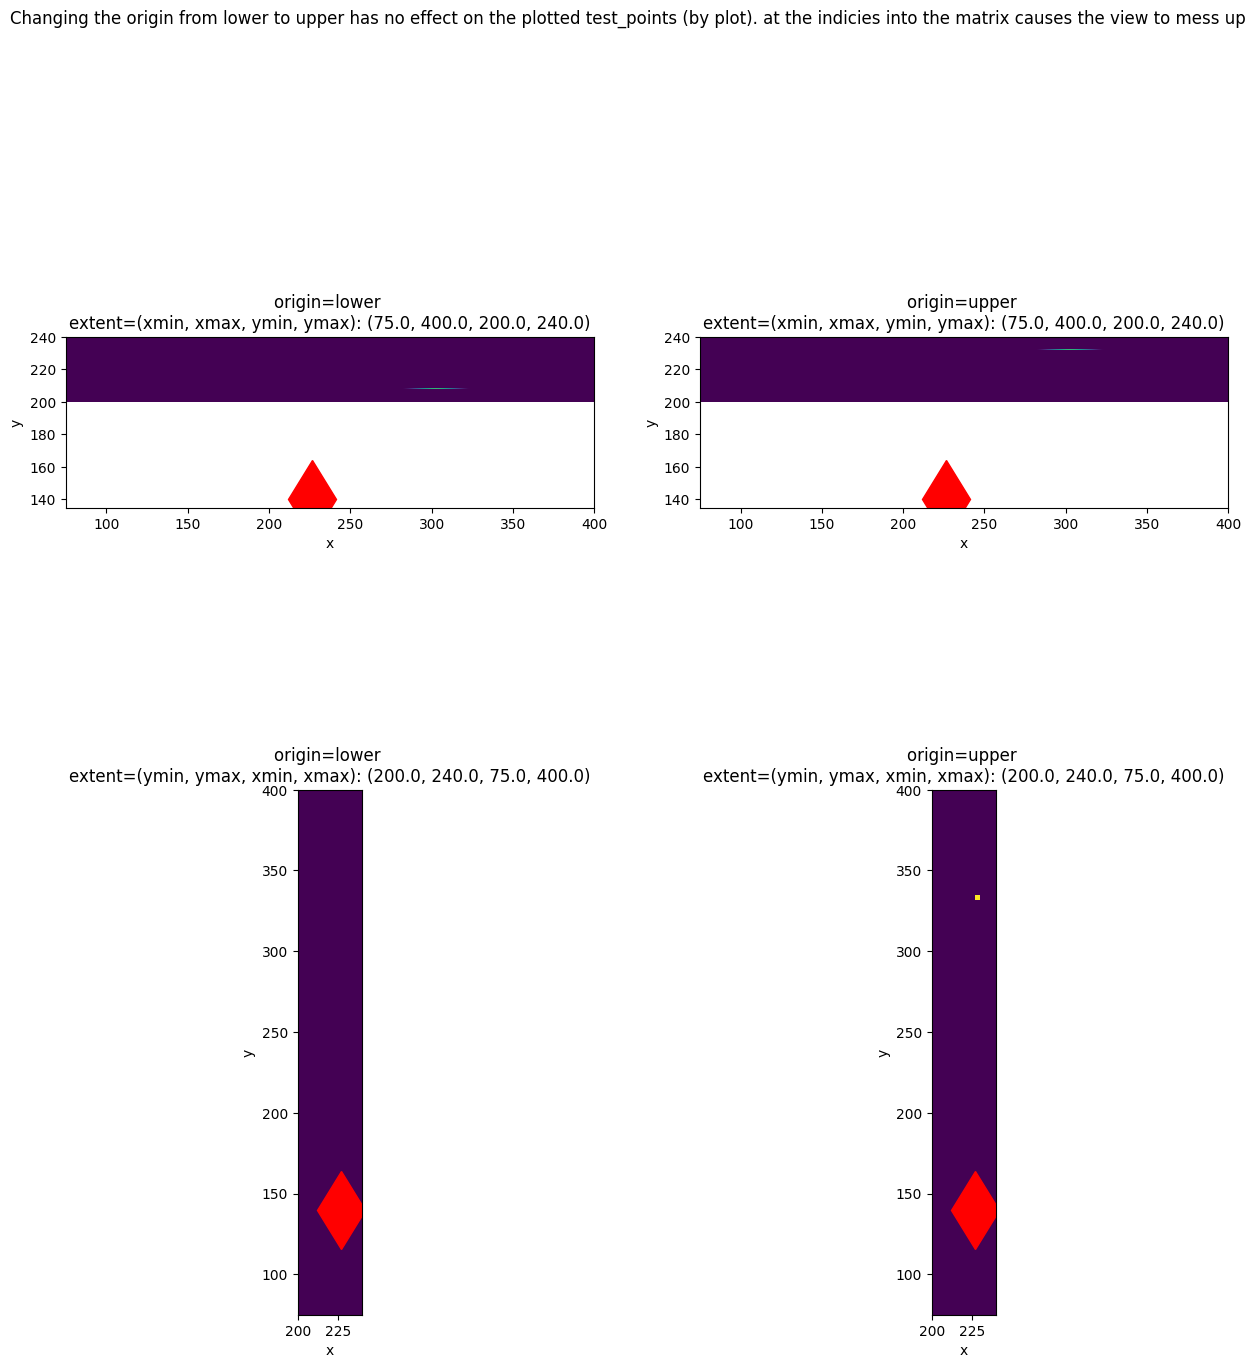

In [14]:
# test_point = [xbin[max_2d_idx[0]], ybin[max_2d_idx[1]]]
# test_point = [xbin[max_2d_idx[1]], ybin[max_2d_idx[0]]] # IndexError: index 20 is out of bounds for axis 0 with size 15
test_point = [ybin_edges[max_2d_idx[1]], xbin_edges[max_2d_idx[0]]]
# Perform the plot:
fig, axs, plot_im_out = test_plot_imshow(xbin_edges, ybin_edges, matrix)
plot_point = test_add_point(test_point, axs[0][0])
plot_point = test_add_point(test_point, axs[0][1])
plot_point = test_add_point(test_point, axs[1][0])
plot_point = test_add_point(test_point, axs[1][1])
plt.suptitle('Changing the origin from lower to upper has no effect on the plotted test_points (by plot). at the indicies into the matrix causes the view to mess up')

## See that only the bottom left plot works!

# Working Configuration:
The only configuration that makes the points line up with the underlying heatmap requires:

1. The origin must be set to `origin=lower`
2. The extents passed to imshow must be set in the form: `y_first_extent = (ymin, ymax, xmin, xmax)`
3. points passed into plot are specified as `plot(y_val, x_val)` instead of the customary `plot(x_val, y_val)`. This can be done by building them this way, or flipping the inputs to plot.
4. you should NOT set 'aspect='auto'' if you want to preserve the original data shape.
5. You need to reverse your calls to ax.set_xlabel and ax.set_ylabel, e.g.: ax.set_xlabel('ACTUALLY Y LABEL')

# Note that despite the image being right, the xlabels and ylabels are now WRONG. They're flipped for some reason!

# Disable autoscaling to get exactly the plot we want:
ax.autoscale(enable=None, axis="x", tight=True) # the tight=true disables margins (which I don't see why we'd need them)
ax.autoscale(enable=None, axis="y", tight=True) 

In [15]:
setup_stable_axes_limits(xbin_edges, ybin_edges, ax[0,0]) # note that the data bounds should be from xbin, not xbin_centers, even though the data should have been computed only on xbin_centers

# Final Working Plot

In [17]:
# The simple goal is to be able to plot a heatmap, for example one obtained from a 2D histogram of x and y data, and plot it with relevant points overlaying it.

def final_x_vertical_plot_imshow(xbin_edges, ybin_edges, matrix):
    """ Plots the matrix data in the 'x == vertical orientation'
    
    fig, ax, im_out = good_plot_imshow(xbin, ybin, matrix) """
    def setup_stable_axes_limits(xbins_edges, ybin_edges, ax):
        " manually sets the axis data limits to disable autoscaling given the xbins_edges/ybin_edges "
        # x == vertical orientation:
        ax.set_xlim(left=ybin_edges[0], right=ybin_edges[-1])
        ax.set_ylim(bottom=xbins_edges[0], top=xbins_edges[-1])
        # x == horizontal orientation:
        # ax.set_xlim(left=xbins_edges[0], right=xbins_edges[-1])
        # ax.set_ylim(bottom=ybin_edges[0], top=ybin_edges[-1])

    fig, axs = plt.subplots(ncols=1, nrows=1, figsize=(15,15), clear=True)
    variable_value = matrix
    
    xmin, xmax, ymin, ymax = (xbin_edges[0], xbin_edges[-1], ybin_edges[0], ybin_edges[-1])
    y_first_extent = (ymin, ymax, xmin, xmax) # swapped the order of the extent axes.
    main_plot_kwargs = {
        'cmap': 'viridis',
        'origin':'lower',
        'extent':y_first_extent,
    }
    
    """
    Note that changing the origin while keeping everything else the same doesn't flip the direction of the yaxis labels despite flipping the yaxis of the data.
    """
    ax = axs
    im_out = ax.imshow(variable_value, **main_plot_kwargs)
    ax.set_title(f'origin=lower \nextent=(ymin, ymax, xmin, xmax): {y_first_extent}')
    # Note that the xlabel and ylabel commands are for the opposite axis!
    ax.set_xlabel('y')
    ax.set_ylabel('x')
    setup_stable_axes_limits(xbin_edges, ybin_edges, ax)
    return fig, axs, im_out

def final_x_vertical_add_point(test_point_x_y, ax):
    """ Plots the data point/points in the 'x == vertical orientation':
    line = good_add_point(test_point, test_point[0], ax) """
    line, = ax.plot(test_point_x_y[1], test_point_x_y[0], marker='d', markersize=40.0, linestyle='None', color='red', alpha=0.5)
    return line


In common usage, the abscissa refers to the horizontal axis and the ordinate refers to the vertical axis of a standard two-dimensional graph. 


Text(0.5, 0.98, 'Final x == vertical axis Plot')

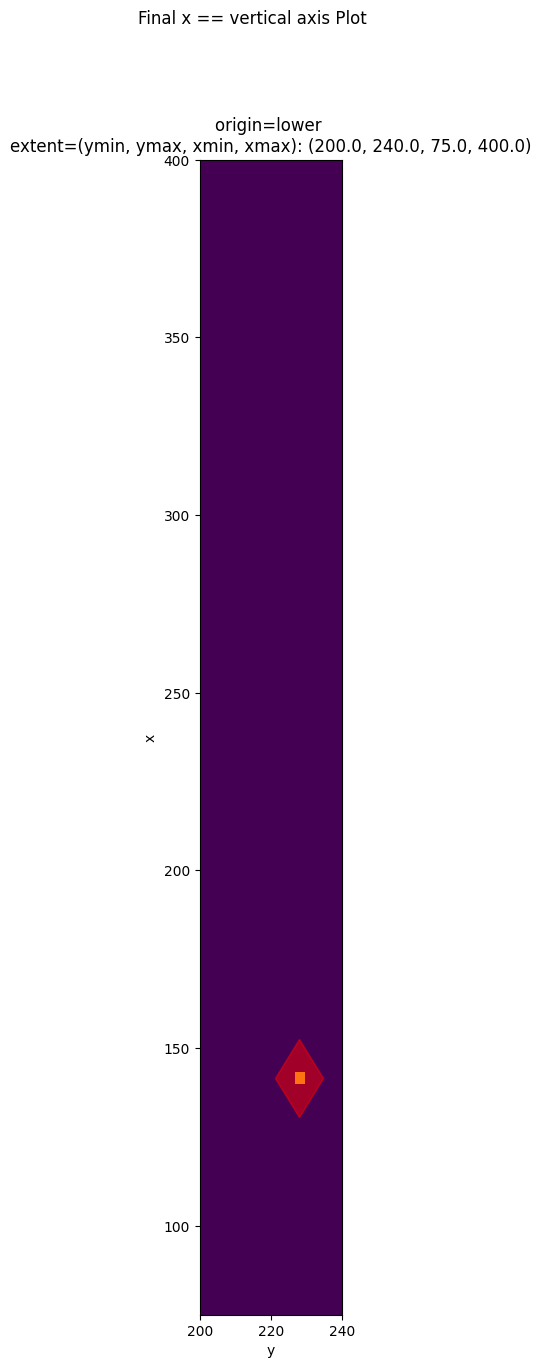

In [18]:
test_point = [xbin_centers[max_2d_idx[0]], ybin_centers[max_2d_idx[1]]] # why wouldn't this be x_bin center if it corresponds to an entry in the matrix with each point corresponding to a center?

# Perform the plot:
fig, axs, plot_im_out = final_x_vertical_plot_imshow(xbin_edges, ybin_edges, matrix)
plot_point = final_x_vertical_add_point(test_point, axs)
plt.suptitle('Final x == vertical axis Plot')


# Attempt to convert data to typical x == horizontal axis plot:

In [19]:
def final_x_horizontal_plot_imshow(xbin_edges, ybin_edges, matrix):
    """ Plots the matrix data in the 'x == horizontal orientation'
    fig, ax, im_out = final_x_horizontal_plot_imshow(xbin, ybin, matrix) """
    def setup_stable_axes_limits(xbins_edges, ybin_edges, ax):
        " manually sets the axis data limits to disable autoscaling given the xbins_edges/ybin_edges "
        # x == horizontal orientation:
        ax.set_xlim(left=xbins_edges[0], right=xbins_edges[-1])
        ax.set_ylim(bottom=ybin_edges[0], top=ybin_edges[-1])

    fig, axs = plt.subplots(ncols=1, nrows=1, figsize=(15,15), clear=True)
    variable_value = matrix
    
    xmin, xmax, ymin, ymax = (xbin_edges[0], xbin_edges[-1], ybin_edges[0], ybin_edges[-1]) # the same for both orientations
    x_first_extent = (xmin, xmax, ymin, ymax) # traditional order of the extant axes
    # y_first_extent = (ymin, ymax, xmin, xmax) # swapped the order of the extent axes.
    main_plot_kwargs = {
        'cmap': 'viridis',
        'origin':'lower',
        'extent':x_first_extent,
    }
    
    """
    Note that changing the origin while keeping everything else the same doesn't flip the direction of the yaxis labels despite flipping the yaxis of the data.
    """
    ax = axs
    im_out = ax.imshow(variable_value, **main_plot_kwargs)
    # ax.set_title(f'origin=lower \nextent=(ymin, ymax, xmin, xmax): {y_first_extent}')
    # Note that the xlabel and ylabel commands are for the opposite axis!
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    setup_stable_axes_limits(xbin_edges, ybin_edges, ax)
    return fig, axs, im_out

def final_x_horizontal_add_point(test_point_x_y, ax):
    """ Plots the data point/points in the 'x == horizontal orientation':
    line = final_x_horizontal_add_point(test_point, test_point[0], ax) """
    line, = ax.plot(test_point_x_y[0], test_point_x_y[1], marker='d', markersize=40.0, linestyle='None', color='red', alpha=0.5)
    return line



Text(0.5, 0.98, 'Final x == horizontal axis Plot')

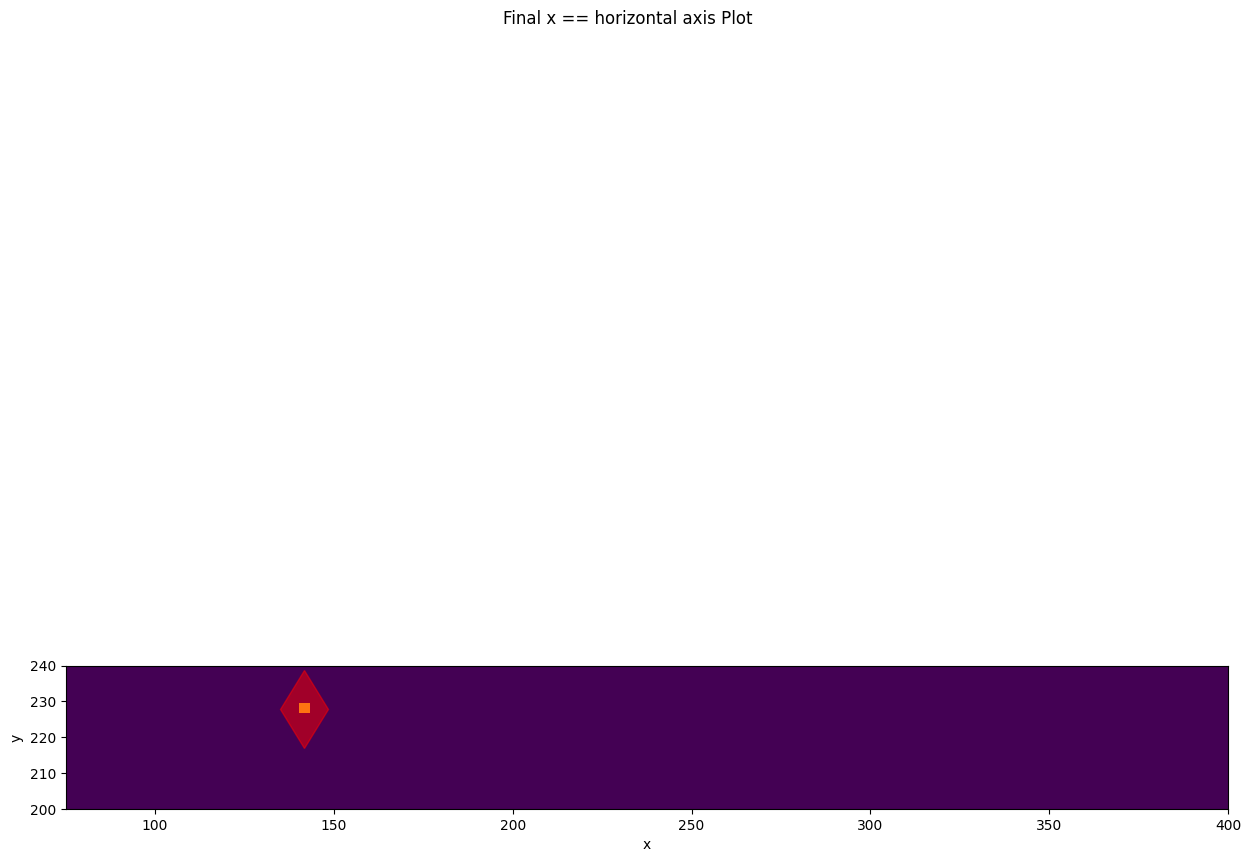

In [20]:
# Either of these approaches work to format the output in a form that final_x_horizontal_* functions can use:
# x_horizontal_matrix = np.swapaxes(matrix, 0, 1)
x_horizontal_matrix = matrix.T

# Perform the plot:
fig, axs, plot_im_out = final_x_horizontal_plot_imshow(xbin_edges, ybin_edges, x_horizontal_matrix)
plot_point = final_x_horizontal_add_point(test_point, axs)
plt.suptitle('Final x == horizontal axis Plot')